#Notebook for Civic Analytics Final Paper

###Informal economy in Mexico

####Data from IMCO
http://imco.org.mx/competitividad/indice-de-competitividad-urbana-2014-quien-manda-aqui/

In [2]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 


import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import mplleaflet
import shapely.geometry as geom
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [3]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [125]:
imco = pd.read_csv('/Users/mariaortiz/PUI2015_mortiz/CivicAnalytics/imcodata3.csv')
#imco.head()

In [128]:
#print(imco.columns)

#Variables

In [129]:
#creating dataframes for different variables to look at
#inf is my independent variable
inf = imco['inf']
citygrowth = imco['citygrowth']
popden = imco['popdensity']
minwage = imco['minwage']
gdppc = imco['gdppc']
pop = imco['population']
index = imco['ciudad']
firms = imco['firmsper1000pea']
accschool = imco['accessgoodschools']
infpercent = imco['infpercent']

#Normalized data
#eleccons = imco['fuelpergdp']/imco['population']
fuelcons = imco['newfuelpc']
waterpc = imco['waterpc']

In [124]:
#viewing cell
imco.columns

Index([u'ciudad', u'clave', u'estado',
       u'Tasa homicidios Por cada cien mil habitantes',
       u'Robo de mercancias: Pesos 2012 por cada millon de pesos de PIB',
       u'safetyperception', u'mtCO2e',
       u'Proporcion del area del municipio con acuiferos sobreexplotados',
       u'waterpc', u'cap tratamiento de agua l/s por cada 1,000 hab',
       u'indice, \rValores de 0-3, en funcion a si mide, publica datos y tiene un Proaire',
       u'goodtrash', u'Aprovecha biogas Si=1, No=0', u'fuelpergdp',
       u'rend academico �% de alumnos de educacion basica y media superior en niveles Bueno y Excelente en Matematicas de prueba ENLACE',
       u'accessgoodschools', u'mortalidad diabetes Por cada 10 mil habitantes',
       u'mort infantil Decesos de menores de un a�o por cada mil nacidos vivos',
       u'Por cada 10 mil habitantes', u'acceso inst salud % de la PEA',
       u'crec accesso salud Tasa de cambio (%) entre 2008 y 2012',
       u' crec pob calificada Tasa de cambio (%) 

#Scatterplots of all variables against informal economy

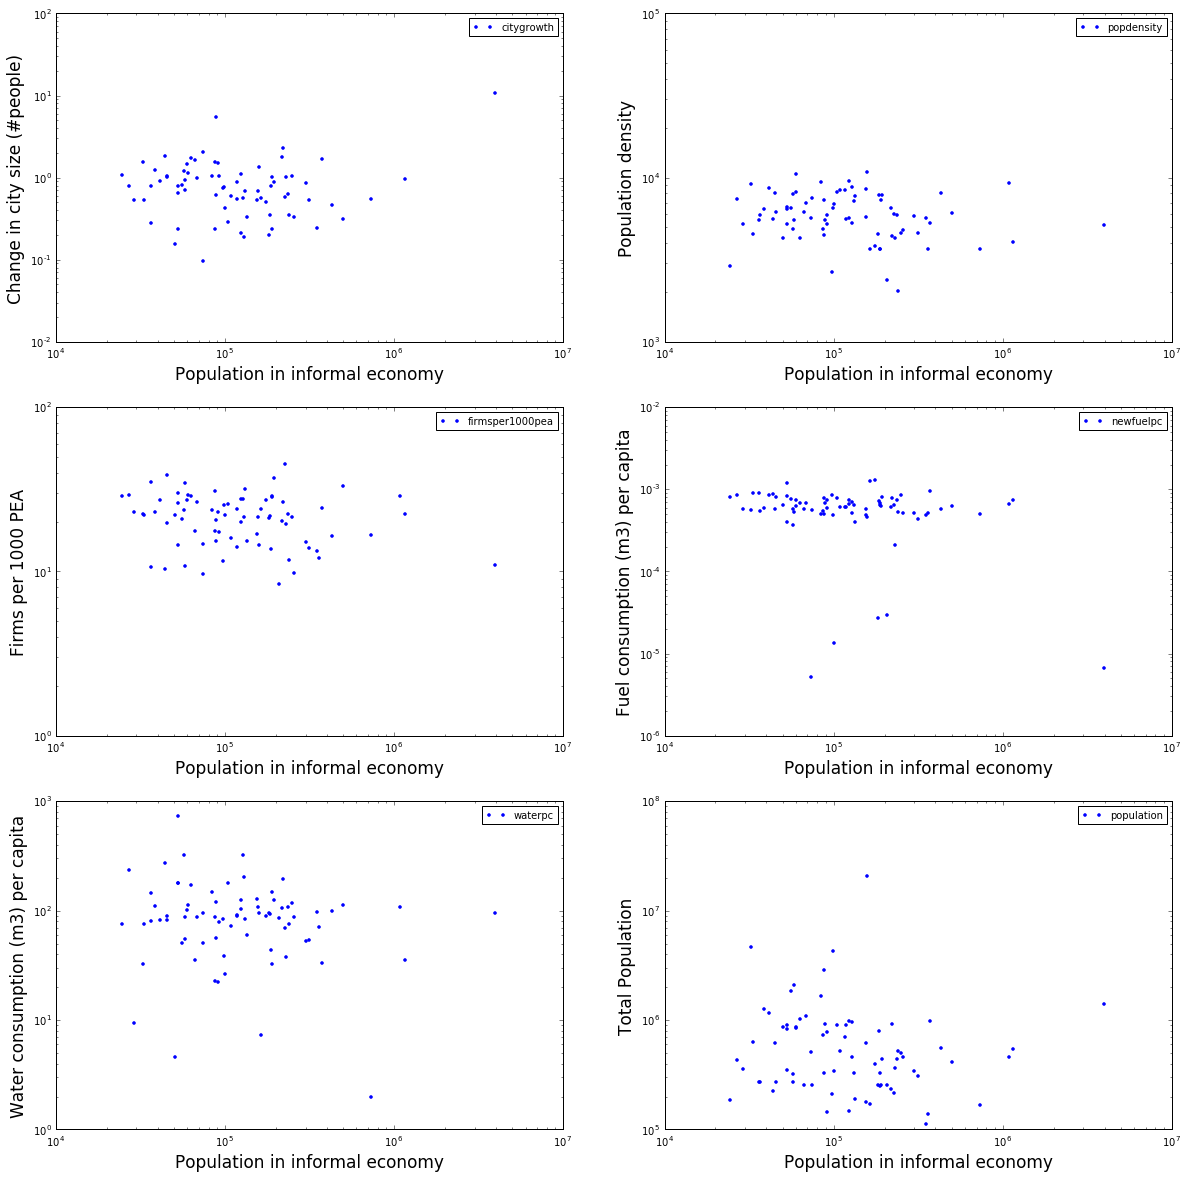

In [39]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(inf, citygrowth, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Change in city size (#people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,2)
pl.loglog(inf, popden, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Population density', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,3)
pl.loglog(inf, firms, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Firms per 1000 PEA', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,4)
#pl.loglog(inf, eleccons, '.')
pl.loglog(inf, fuelcons, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Fuel consumption (m3) per capita', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,5)
pl.loglog(inf, waterpc, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Water consumption (m3) per capita', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,6)
pl.loglog(inf, pop, '.')
pl.xlabel('Population in informal economy', fontsize=17)
pl.ylabel('Total Population', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

#Scatterplots against GDP per Capita

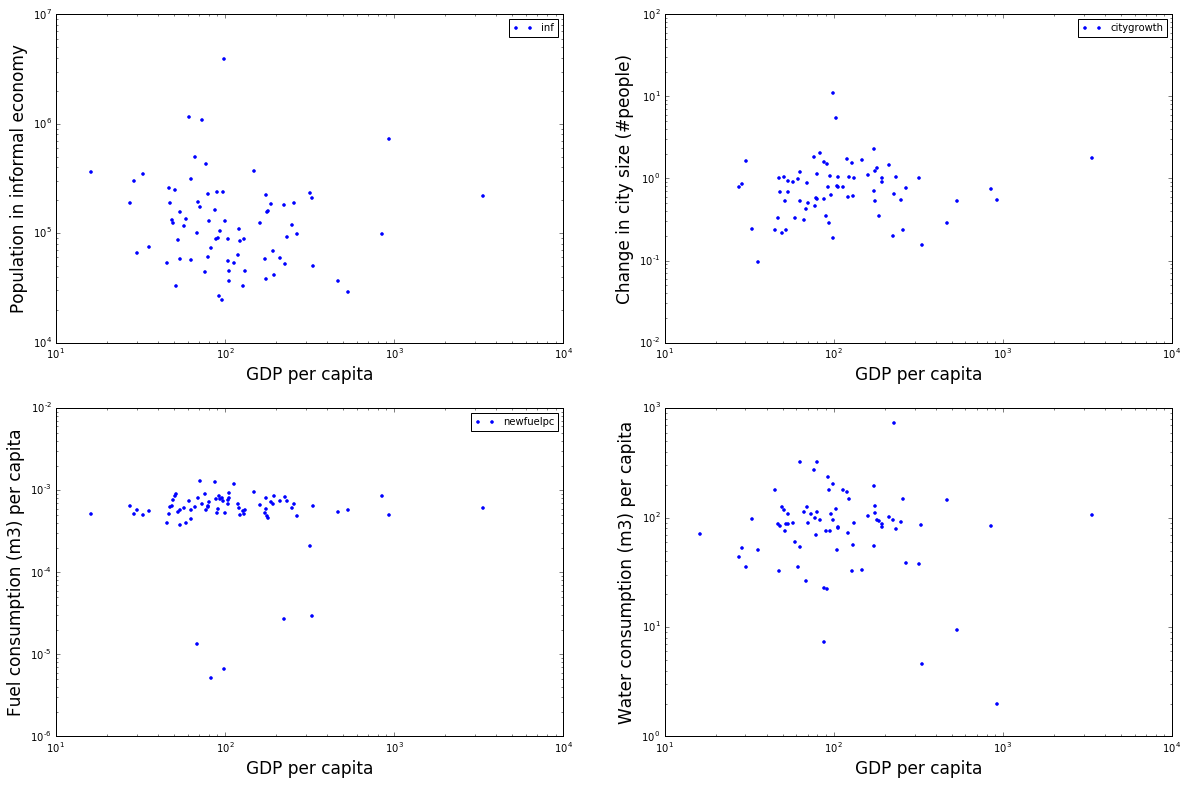

In [41]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(gdppc, inf, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Population in informal economy', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,2)
#pl.loglog(gdppc, accschool, '.')
pl.loglog(gdppc, citygrowth, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Change in city size (#people)', fontsize=17)
#pl.ylabel('Access to quality schools', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,3)
#pl.loglog(gdppc, eleccons, '.')
pl.loglog(gdppc, fuelcons, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Fuel consumption (m3) per capita', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,4)
pl.loglog(gdppc, waterpc, '.')
pl.xlabel('GDP per capita', fontsize=17)
pl.ylabel('Water consumption (m3) per capita', fontsize=17)
#pl.legend(loc = 0, fontsize = 10)


#Scatter plots against City Growth

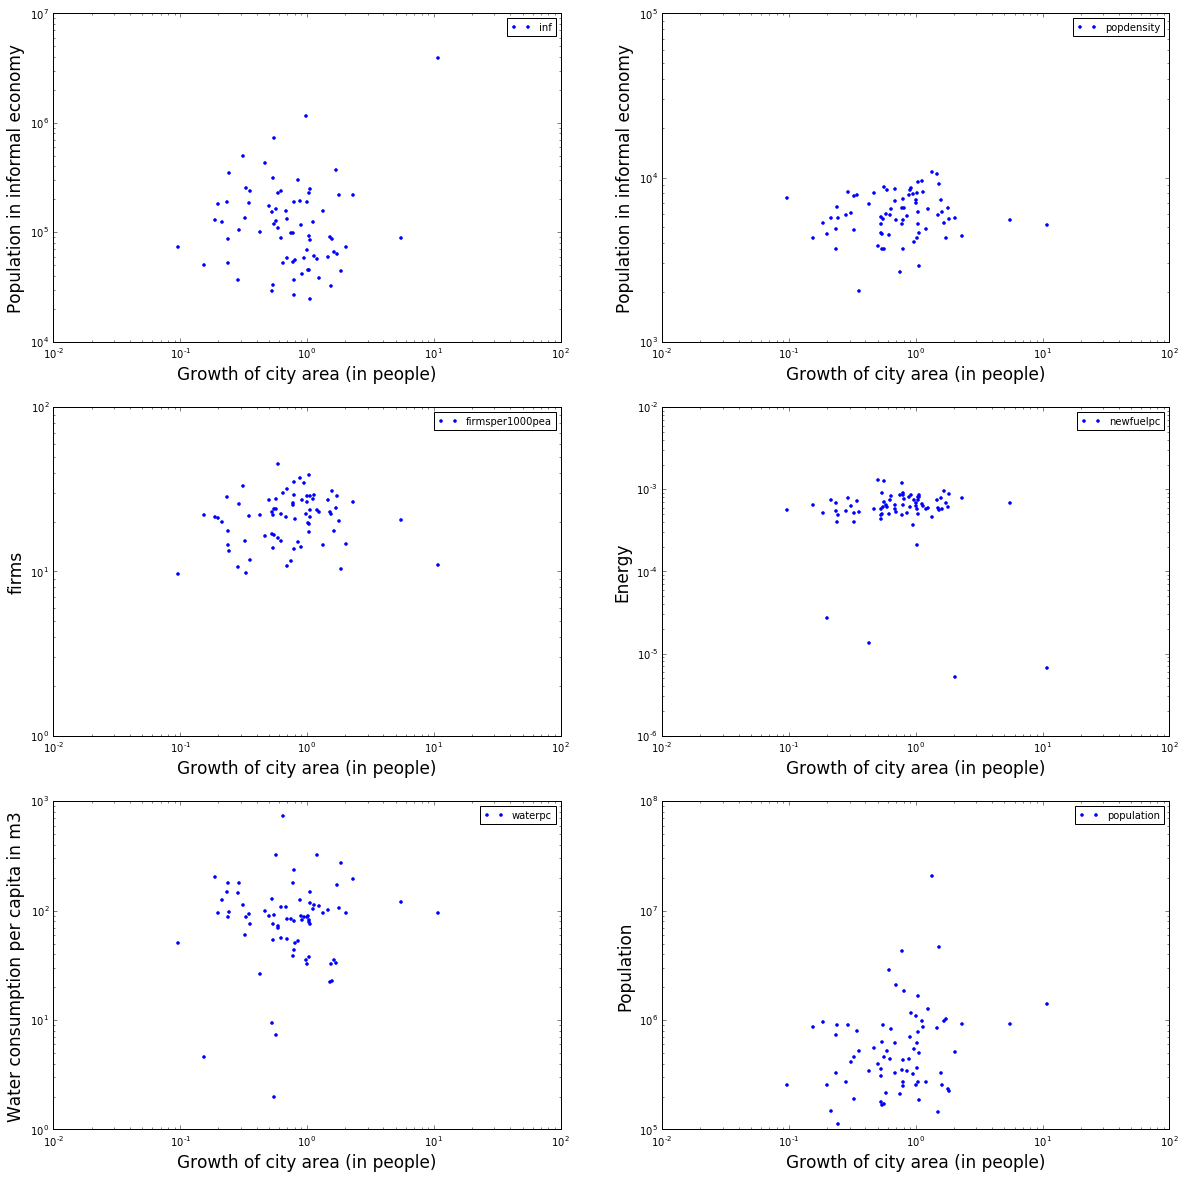

In [29]:
fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(citygrowth, inf, '.')
pl.ylabel('Population in informal economy', fontsize=17)
pl.xlabel('Change in city size (#people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(3,2,2)
pl.loglog(citygrowth, popden, '.')
pl.ylabel('Population in informal economy', fontsize=17)
pl.xlabel('Change in city size (#people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,3)
pl.loglog(citygrowth, firms, '.')
pl.ylabel('firms', fontsize=17)
pl.xlabel('Change in city size (#people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,4)
#pl.loglog(citygrowth, eleccons, '.')
pl.loglog(citygrowth, fuelcons, '.')
pl.ylabel('Fuel consumption (m3) per capita', fontsize=17)
pl.xlabel('Change in city size (#people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,5)
pl.loglog(citygrowth, waterpc, '.')
pl.ylabel('Water consumption per capita in m3', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,6)
pl.loglog(citygrowth, pop, '.')
pl.ylabel('Population', fontsize=17)
pl.xlabel('Growth of city area (in people)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

http://people.duke.edu/~rnau/rsquared.htm

#Simple Linear Regression Models

In [30]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 

###Informal Economy, GDP pc

In [131]:
#Informal Economy, GDP pc
d = {'x': infpercent, 'y': gdppc}
# Run regression and print summary
mod = smf.ols(formula='y ~ x', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2326
Date:                Thu, 17 Dec 2015   Prob (F-statistic):              0.631
Time:                        22:51:45   Log-Likelihood:                -576.65
No. Observations:                  78   AIC:                             1157.
Df Residuals:                      76   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    292.2706    223.548      1.307      0.1

In [13]:
pop.min()

111614.1934

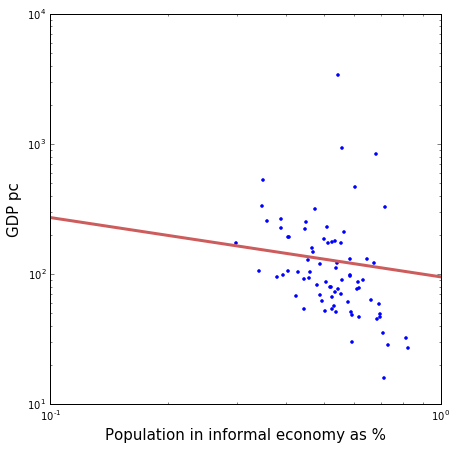

In [132]:
figure, ax = pl.subplots(figsize=(7,7))
y = gdppc#/1000
x = infpercent
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('GDP pc', fontsize = 15)
pl.xlabel('Population in informal economy as %', fontsize = 15)
#ax.set_xlim=(0,2000000)
#ax.set_ylim(0,60)

###Informal Economy, City growth

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     77.15
Date:                Thu, 17 Dec 2015   Prob (F-statistic):           3.47e-13
Time:                        22:52:49   Log-Likelihood:                -107.31
No. Observations:                  78   AIC:                             218.6
Df Residuals:                      76   BIC:                             223.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5143      0.121      4.241      0.0

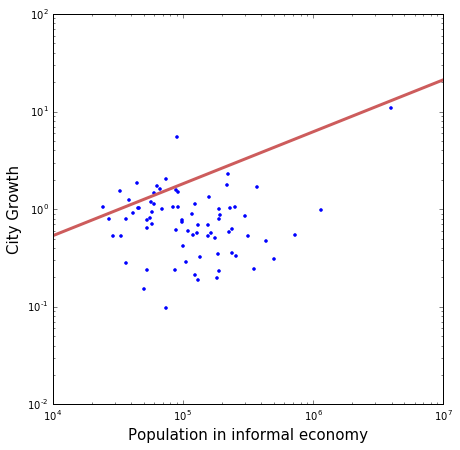

In [134]:
#Citygrowth
d = {'x': inf, 'y': citygrowth}
# Run regression and print summary
mod2 = smf.ols(formula='y ~ x', data = d).fit()
print(mod2.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = citygrowth
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod2, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('City Growth', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


###Informal Economy, fuel consumption

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.061
Date:                Thu, 17 Dec 2015   Prob (F-statistic):              0.306
Time:                        22:53:05   Log-Likelihood:                 539.63
No. Observations:                  78   AIC:                            -1075.
Df Residuals:                      76   BIC:                            -1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      5.591      0.0

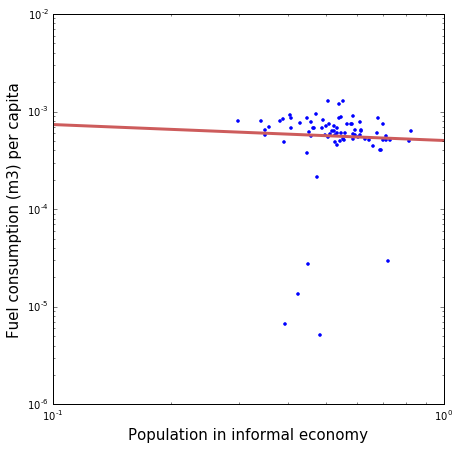

In [135]:
#fuel consumption
d = {'x': inf, 'y': fuelcons}
# Run regression and print summary
mod3 = smf.ols(formula='y ~ x', data = d).fit()
print(mod3.summary())

figure, ax = pl.subplots(figsize=(7,7))
y = fuelcons
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod3, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Fuel consumption (m3) per capita', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


###Informal Economy, Water Consumption

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4639
Date:                Thu, 17 Dec 2015   Prob (F-statistic):              0.498
Time:                        20:06:30   Log-Likelihood:                -465.69
No. Observations:                  78   AIC:                             935.4
Df Residuals:                      76   BIC:                             940.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    108.2947     11.998      9.026      0.0

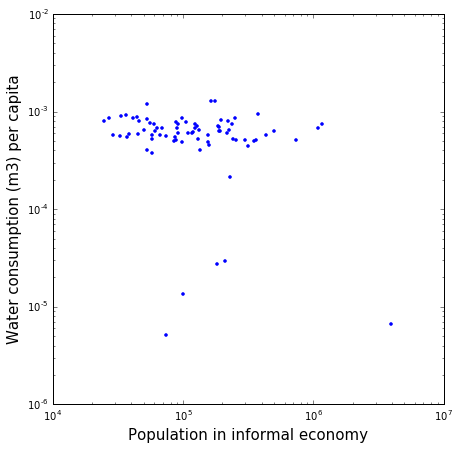

In [43]:
d = {'x': inf, 'y': waterpc}
# Run regression and print summary
mod4 = smf.ols(formula='y ~ x', data = d).fit()
print(mod4.summary())

figure, ax = pl.subplots(figsize=(7,7))
y = fuelcons
x = inf
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod4, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Water consumption (m3) per capita', fontsize = 15)
pl.xlabel('Population in informal economy', fontsize = 15)


#Multivariate Regression

In [167]:
#Electricty
#d = {'x': inf, 'y': eleccons}
# Run regression and print summary
mod5 = smf.ols(formula= 'z ~ x1 + x2 + x3', data = {'z':imco.inf,
                                                    'x1':imco.waterpc,
                                                    'x2':imco.newfuelpc,
                                                    'x3':imco.citygrowth}).fit()
mod4.summary()
#mod4.params
#here we only see one x...it appears to be summing or something!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4639
Date:                Fri, 18 Dec 2015   Prob (F-statistic):              0.498
Time:                        00:44:18   Log-Likelihood:                -465.69
No. Observations:                  78   AIC:                             935.4
Df Residuals:                      76   BIC:                             940.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    108.2947     11.998      9.026      0.000        84.398   132.192
x          -1.583e-05   2.32e-05     -0.681      0.498     -6.21e-05  3.05e-05
==============================================================================
Omnibus:                      100.055   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1805.434
Skew:                           3.975   Prob(JB):                         0.00
Kurtosis:                      25.188   Cond. No.                     5.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

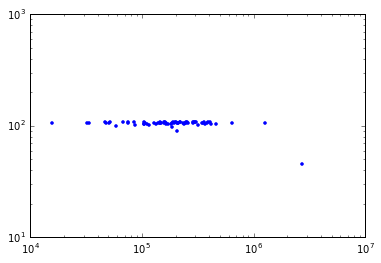

In [50]:
mod5.predict()
pl.loglog(mod5.predict(),mod4.predict(), '.')

In [168]:
mod6 = smf.ols(formula= 'y ~ x1 + x2', data = {'y':imco.citygrowth,
                                                    'x1':imco.inf,
                                                    'x2':imco.gdppc,}).fit()
mod6.summary()
#mod6.params
#print(mod4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     38.36
Date:                Fri, 18 Dec 2015   Prob (F-statistic):           3.36e-12
Time:                        00:47:01   Log-Likelihood:                -107.16
No. Observations:                  78   AIC:                             220.3
Df Residuals:                      75   BIC:                             227.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4861      0.133      3.663      0.000         0.222     0.750
x1          2.064e-06   2.36e-07      8.744      0.000      1.59e-06  2.53e-06
x2             0.0002      0.000      0.537      0.593        -0.000     0.001
==============================================================================
Omnibus:                       37.576   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.486
Skew:                           1.199   Prob(JB):                     5.94e-48
Kurtosis:                      10.821   Cond. No.                     6.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
mod7 = smf.ols(formula= 'z ~ x1 + x2', data = {'z':imco.inf,
                                                    'x1':imco.gdppc,
                                                    'x2':imco.citygrowth,
                                                     }).fit()
mod7.summary()
#mod4.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     38.23
Date:                Fri, 18 Dec 2015   Prob (F-statistic):           3.57e-12
Time:                        01:02:58   Log-Likelihood:                -1101.6
No. Observations:                  78   AIC:                             2209.
Df Residuals:                      75   BIC:                             2216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.025e+04   4.96e+04     -0.207      0.837     -1.09e+05  8.85e+04
x1           -39.2346     96.615     -0.406      0.686      -231.702   153.233
x2          2.446e+05    2.8e+04      8.744      0.000      1.89e+05     3e+05
==============================================================================
Omnibus:                       30.228   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.688
Skew:                           1.011   Prob(JB):                     1.87e-28
Kurtosis:                       8.933   Cond. No.                         600.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#print("Params: ", mod5.params)
#print("")
#print("Confidence interval: ", mod5.conf_int())
#print("")
#print("P values: ", mod5.pvalues)
#print("")
#print("R2: ", mod5.rquared())

##Distributions, Data Exploring

In [53]:
print(inf.min())
print(inf.max())

24490.9605
3948901.569


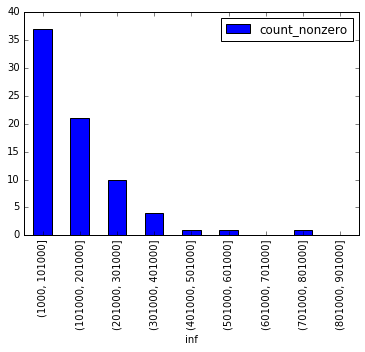

In [54]:
#number of workers in informal economy
fig = pl.figure(figsize=(10,10))
bins = np.arange(1000, 1000000, 100000)
inf.groupby(pd.cut(inf, bins)).agg([count_nonzero]).plot(kind='bar')

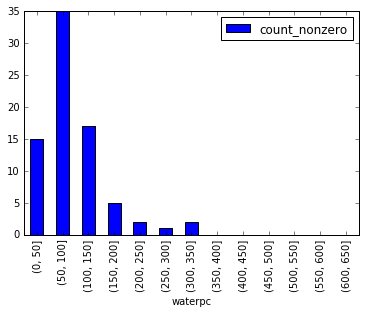

In [55]:
#water consumption
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 700, 50)
waterpc.groupby(pd.cut(waterpc, bins)).agg([count_nonzero]).plot(kind='bar')

In [60]:
#electricity consumption
#fuelcons.min()
fuelcons.max()

0.0012868369999999999

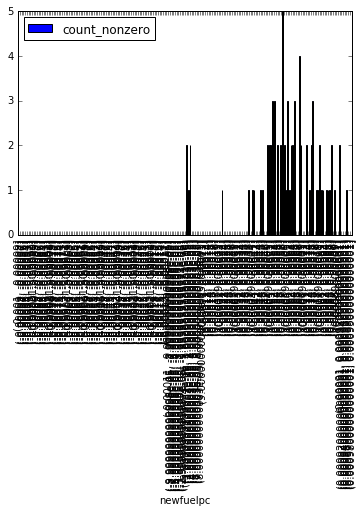

In [154]:
fig = pl.figure(figsize=(30,30))
bins = np.arange(-.001, .001, .00001)

fuelcons.groupby(pd.cut(fuelcons, bins)).agg([count_nonzero]).plot(kind='bar')

In [16]:
#city growth
citygrowth.max()

10.85346663

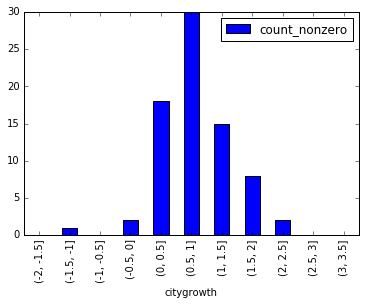

In [77]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(-2, 4, 0.5)
citygrowth.groupby(pd.cut(citygrowth, bins)).agg([count_nonzero]).plot(kind='bar')

#Testing

In [80]:
import scipy.stats

###KS Test

In [136]:
kse=scipy.stats.ks_2samp(fuelcons, inf)
print("Electricity: ", kse)
print("")
ksw=scipy.stats.ks_2samp(waterpc, inf)
print("Water: ", ksw)
kse=scipy.stats.ks_2samp(fuelcons, inf)
print("Electricity: ", kse)
print("")
ksw=scipy.stats.ks_2samp(waterpc, inf)
print("Water: ", ksw)

#getting the same values...something is off

Electricity:  (1.0, 8.2543159563119173e-36)

Water:  (1.0, 8.2543159563119173e-36)


In [82]:
variablesks = [fuelcons, waterpc, minwage, citygrowth, popden]
counter = 0

for i in variablesks: 
    ks=scipy.stats.ks_2samp(inf,i)
    #print(i)
    print("KS: ", ks)
    counter +=1
#waterpc.mean()

KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)
KS:  (1.0, 8.2543159563119173e-36)


###Spearmans

In [141]:
#running spearmans
r_Se = scipy.stats.spearmanr(inf, fuelcons)
print(r_Se)
r_Sw = scipy.stats.spearmanr(inf, waterpc)
print(r_Sw)

(-0.21316658025518787, 0.060952454172955431)
(-0.074545707457099861, 0.51656861241668084)


In [155]:
#attempting spearmans in for loop
variables = [gdppc, waterpc, fuelcons, citygrowth]

for i in variables: 
    sp= scipy.stats.spearmanr(inf, i)
    print("Spearman: ", sp)

Spearman:  (-0.20891766461386715, 0.066411785541172524)
Spearman:  (-0.074545707457099861, 0.51656861241668084)
Spearman:  (-0.21316658025518787, 0.060952454172955431)
Spearman:  (-0.22507871874960483, 0.04756336164237529)


###Pearsons-


In [139]:
#nanfreewater = waterpc[(~np.isnan(waterpc))]
r_Pp = scipy.stats.pearsonr(inf, popden)
print("Pearson for Pop Density: ", r_Pp)
print("")
r_Pe = scipy.stats.pearsonr(inf, fuelcons)
print("Pearson for Electricity: ", r_Pe)
print("")
r_Pw = scipy.stats.pearsonr(inf, waterpc)
print("Pearson for Water: ", r_Pw)
print("")
r_Pc = scipy.stats.pearsonr(inf, citygrowth)
print("Pearson for City: ", r_Pc)
print("")
r_Pg = scipy.stats.pearsonr(inf, gdppc)
print("Pearson for GDP: ", r_Pg)
print("")

Pearson for Pop Density:  (-0.09694107417089956, 0.39848576289553372)

Pearson for Electricity:  (-0.27687164345039544, 0.014129140119317103)

Pearson for Water:  (-0.077891051741466211, 0.49787341325991397)

Pearson for City:  (0.70975218554740638, 3.4701844667797383e-13)

Pearson for GDP:  (-0.0040656088685324413, 0.97181906714313337)



In [23]:
geocities = pd.read_csv('/Users/mariaortiz/PUI2015/CA_Final/metromexlatlong.csv')
geocities

ciudad  clave               estado       latitude  \
0            Aguascalientes      1       Aguascalientes     21�53_00_N   
1                  Ensenada     55      Baja California     31�52_00_N   
2                  Mexicali      3      Baja California     32�39_07_N   
3                   Tijuana      2      Baja California     32�32_00_N   
4                    La Paz     56  Baja California Sur     24�10_00_N   
5                 Los Cabos     57  Baja California Sur   23��15_�0_�N   
6                  Campeche     58             Campeche     19�51_00_N   
7         Ciudad del Carmen     59             Campeche     18�38_00_N   
8                  Saltillo      5             Coahuila     25�25_00_N   
9         Monclova-Frontera      6             Coahuila     26�54_00_N   
10                La Laguna      4             Coahuila     26�41_00_N   
11           Piedras Negras      7             Coahuila     28�25_00_N   
12                  Tecoman      9               Colima     18�55_00_N   
13  Colima-Villa de alvarez      8               Colima     19�14_00_N   
14               Manzanillo     60               Colima     19�03_00_N   
15         Tuxtla Gutierrez     10              Chiapas     16�45_00_N   
16                Tapachula     61              Chiapas     25�51_00_N   
17                Chihuahua     12            Chihuahua     28�38_00_N   
18                   Juarez     11            Chihuahua     28�13_00_N   
19          Valle de Mexico     13     Distrito Federal     32�29_29_N   
20                  Durango     62              Durango     24�02_00_N   
21                   Celaya     63           Guanajuato     20�31_00_N   
22               Guanajuato     64           Guanajuato     21�01_00_N   
23                 Irapuato     65           Guanajuato     20�41_00_N   
24                     Leon     14           Guanajuato     21�07_00_N   
25        La Piedad-Penjamo     26           Guanajuato  20��25_�52_�N   

          longitude  
0       102�18_00_W  
1       116�37_00_W  
2       115�28_06_W  
3       117�01_00_W  
4       110�18_00_W  
5   109� 45' 00'' W  
6        90�32_00_W  
7        91�50_00_W  
8       101�00_00_W  
9       101�25_00_W  
10      101�53_00_W  
11      104�23_00_W  
12      103�53_00_W  
13      103�43_00_W  
14      104�19_08_W  
15       93�07_00_W  
16      108�27_00_W  
17      106�05_00_W  
18      105�19_00_W  
19      115�02_13_W  
20      104�40_00_W  
21      100�49_00_W  
22      101�15_00_W  
23      101�21_00_W  
24      101�40_00_W  
25     101� 25' 52"

In [24]:
#metroAreas = gp.read_file('/Users/mariaortiz/Desktop/CUSP/Civic Analytics/Final paper/national_zonas_metro.shp')

##Cluster Analysis

In [88]:
import scipy
import sklearn.cluster
#from sklearn import mixture
#from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2, vq, whiten, kmeans

###Bad Clustering...

In [89]:
cluster = imco[['newfuelpc', 'waterpc', 'popdensity']]
#cluster.shape
vcluster = cluster.values
#print(vcluster)

In [90]:
c2kmeans = scipy.cluster.vq.kmeans(vcluster, 2, iter=1)

kmlabels2, kmdistances2 = vq(vcluster, c2kmeans[0])
print ("2 clusters labels")
print (kmlabels2)

2 clusters labels
[0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0
 1 1 1 0]


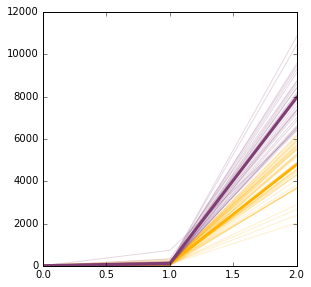

In [28]:
fig = pl.figure(figsize=(10,10))

pl.subplot(2,2,1)
for l in range(2):
    pl.plot(vcluster[kmlabels2 == l].T, 
            color = kelly_colors_hex[l], alpha = 0.2)
    pl.plot(c2kmeans[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
#pl.xlabel('Cities', fontsize = 15)
#pl.ylabel('Water, electricity..', fontsize = 15)
#pl.suptitle('City Comparison')

In [29]:
c3kmeans = scipy.cluster.vq.kmeans(vcluster, 3, iter=1)

kmlabels3, kmdistances3 = vq(vcluster, c3kmeans[0])
print ("3 clusters labels")
print (kmlabels3)

3 clusters labels
[2 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 2 2 2 0 2 2 2 2 0 0 0 0 1 1 1 2 0 0
 0 2 2 2 1 0 2 0 1 1 1 1 2 1 0 0 1 0 2 2 2 2 0 0 1 2 0 0 1 0 0 1 2 2 0 2 2
 0 1 1 2]


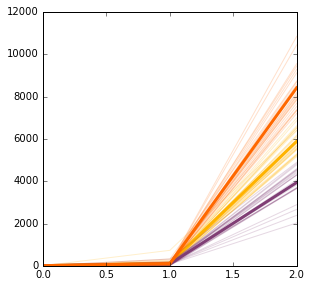

In [30]:
fig = pl.figure(figsize=(10,10))

pl.subplot(2,2,1)
for l in range(3):
    pl.plot(vcluster[kmlabels3 == l].T, 
            color = kelly_colors_hex[l], alpha = 0.2)
    pl.plot(c3kmeans[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')


#Better clustering!

In [205]:
citysizeraw = imco[['ciudad', 'inf', 'citygrowth', 'waterpc', 'newfuelpc', 'gdppc']]

In [206]:
citysize = citysizeraw.set_index(['ciudad'])
cityname = citysize.index.values

#citysize
#urban intensity
#density and consumption
#normalize and cluster by one feature

In [207]:
citycluster = citysize.values
(citysize).shape
#here we tak away population as it is has too strong of an influence on the clusters and was pushing them in one direction
#(finalcluster[:,:6]).shape

(78, 5)

In [208]:
normcluster = citycluster - citycluster.mean(axis=0).T
w = whiten(normcluster)
w.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.])

#k means with 6 Clusters all features

In [213]:
final_5ck = scipy.cluster.vq.kmeans(w, 6, iter=1)
kmlabels5, kmdistances5 = vq(w, final_5ck[0])
print ("5 clusters labels")
print (kmlabels5)

5 clusters labels
[5 1 1 5 1 1 4 2 5 0 5 1 5 1 1 0 5 1 3 5 0 5 0 0 0 5 0 0 0 0 5 1 5 5 5 5 0
 5 5 5 5 0 0 0 5 1 2 5 0 1 2 1 4 0 5 1 1 4 1 5 4 2 5 5 2 1 5 2 0 1 5 5 5 5
 5 2 1 0]


In [214]:
#sanity check
citycluster[0]

array([  1.23822662e+05,   1.11744126e+00,   1.03385094e+02,
         6.71032000e-04,   1.60234136e+02])

In [211]:
print (kmlabels5 == 0)
print ((citycluster[kmlabels5 == 0]).shape)
print ((citycluster[kmlabels5 == 1]).shape)

[False  True  True False  True  True False False False False False  True
 False  True  True False False  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False  True False False
 False  True False  True  True False False  True  True False  True False
 False False False False False  True  True False False  True  True False
 False False False False  True False]
(21, 5)
(46, 5)


cluster 1:  ['Monclova-Frontera' 'Tuxtla Gutierrez' 'Durango' 'Guanajuato' 'Irapuato'
 'Leon' 'San Francisco del Rincon' 'Salamanca' 'Moroleon-Uriangato'
 'Acapulco' 'Puerto Vallarta' 'Cuautla' 'Cuernavaca' 'Tepic' 'Tehuacan'
 'Rioverde-Ciudad Fernandez' 'Tlaxcala-Apizaco' 'Zacatecas-Guadalupe']
cluster 2:  ['Ensenada' 'Mexicali' 'La Paz' 'Los Cabos' 'Piedras Negras'
 'Colima-Villa de alvarez' 'Manzanillo' 'Chihuahua' 'Tula' 'Oaxaca'
 'Queretaro' 'Cancun' 'Los Mochis' 'Culiacan' 'Ciudad Obregon '
 'Nuevo Laredo' 'Veracruz' 'Merida']
cluster 3:  ['Ciudad del Carmen' 'Tehuantepec-Salina Cruz' 'San Juan del Rio'
 'Cardenas' 'Matamoros' 'Ciudad Victoria' 'Minatitlan']
cluster 4:  ['Juarez']
cluster 5:  ['Campeche' 'Chetumal ' 'Mazatlan' 'Hermosillo']
cluster 6:  ['Aguascalientes' 'Tijuana' 'Saltillo' 'La Laguna' 'Tecoman' 'Tapachula'
 'Valle de Mexico' 'Celaya' 'La Piedad-Penjamo' 'Chilpancingo' 'Tulancingo'
 'Pachuca' 'Guadalajara' 'Ocotlan' 'Toluca' 'Zamora-Jacona' 'Morelia'
 'Uruapan' '

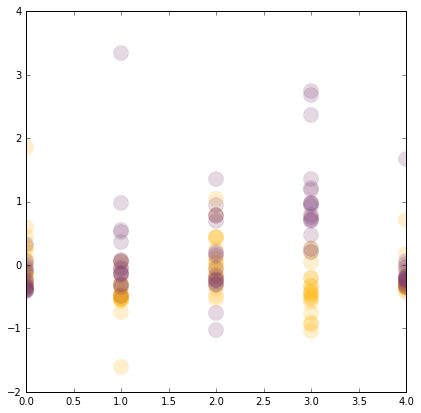

In [215]:
fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[kmlabels5 == l])):
        pl.plot(w[kmlabels5 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
#pl.xlabel('Cities', fontsize = 15)
#pl.ylabel('Variables: informal economy, water, growth, popdensity', fontsize = 13)
ax.set_title('test', fontsize = 12)
print ("cluster 1: ", cityname[kmlabels5 == 0])
print ("cluster 2: ", cityname[kmlabels5 == 1])
print ("cluster 3: ", cityname[kmlabels5 == 2])
print ("cluster 4: ", cityname[kmlabels5 == 3])
print ("cluster 5: ", cityname[kmlabels5 == 4])
print ("cluster 6: ", cityname[kmlabels5 == 5])

In [179]:
import plotly.plotly as py
from plotly.graph_objs import *

In [180]:
py.iplot_mpl(fig)

#k means with 10 CLUSTERS

In [184]:
final_10ck = scipy.cluster.vq.kmeans(w, 10, iter=1)
kmlabels10, kmdistances10 = vq(w, final_10ck[0])
#print ("5 clusters labels")
#print (kmlabels5)
print ("cluster 1: ", cityname[kmlabels10 == 0])
print ("cluster 2: ", cityname[kmlabels10 == 1])
print ("cluster 3: ", cityname[kmlabels10 == 2])
print ("cluster 4: ", cityname[kmlabels10 == 3])
print ("cluster 5: ", cityname[kmlabels10 == 4])
print ("cluster 6: ", cityname[kmlabels10 == 5])
print ("cluster 7: ", cityname[kmlabels10 == 6])
print ("cluster 8: ", cityname[kmlabels10 == 7])
print ("cluster 9: ", cityname[kmlabels10 == 8])
print ("cluster 10: ", cityname[kmlabels10 == 9])

cluster 1:  ['Campeche' 'Chihuahua' 'Cancun' 'Chetumal ' 'Mazatlan' 'Ciudad Obregon '
 'Merida']
cluster 2:  ['Monclova-Frontera' 'Guanajuato' 'Salamanca' 'Acapulco' 'Cuernavaca'
 'Culiacan']
cluster 3:  ['Ensenada' 'Mexicali' 'La Paz' 'Los Cabos' 'Piedras Negras'
 'Colima-Villa de alvarez' 'Manzanillo' 'Tula' 'Oaxaca' 'Queretaro'
 'Nuevo Laredo']
cluster 4:  ['San Juan del Rio' 'Cardenas' 'Matamoros' 'Ciudad Victoria' 'Minatitlan']
cluster 5:  ['Aguascalientes' 'Tijuana' 'Tecoman' 'Irapuato' 'Puerto Vallarta'
 'Uruapan' 'Tepic' 'San Luis Potosi-Soledad' 'Los Mochis' 'Guaymas'
 'Villahermosa' 'Tampico-Panuco' 'Reynosa-Rio Bravo' 'Veracruz' 'Orizaba'
 'Xalapa' 'Poza Rica']
cluster 6:  ['Hermosillo']
cluster 7:  ['Saltillo' 'Tuxtla Gutierrez' 'La Piedad-Penjamo'
 'San Francisco del Rincon' 'Moroleon-Uriangato' 'Toluca' 'Cuautla'
 'Monterrey' 'Puebla-Tlaxcala' 'Tehuacan' 'Rioverde-Ciudad Fernandez'
 'Tlaxcala-Apizaco' 'Coatzacoalcos']
cluster 8:  ['Tapachula' 'Chilpancingo' 'Tulancingo' '

#Clustering only for significant values

In [190]:
citysizeraw2 = imco[['ciudad', 'inf', 'citygrowth', 'gdppc']]
citysize2 = citysizeraw2.set_index(['ciudad'])
cityname = citysize2.index.values
citycluster2 = citysize2.values
(citysize2).shape
normcluster2 = citycluster2 - citycluster2.mean(axis=0).T
w2 = whiten(normcluster2)
w2.std(axis=0)

array([ 1.,  1.,  1.])

cluster 1:  ['Mexicali' 'Chihuahua' 'Valle de Mexico' 'Chilpancingo' 'Guadalajara'
 'Ocotlan' 'Cancun' 'Chetumal ' 'Matamoros' 'Veracruz' 'Cordoba' 'Merida']
cluster 2:  ['Juarez']
cluster 3:  ['Rioverde-Ciudad Fernandez']
cluster 4:  ['Aguascalientes' 'Ensenada' 'Tijuana' 'La Paz' 'Los Cabos' 'Campeche'
 'Saltillo' 'Monclova-Frontera' 'La Laguna' 'Piedras Negras' 'Tecoman'
 'Colima-Villa de alvarez' 'Manzanillo' 'Tuxtla Gutierrez' 'Tapachula'
 'Durango' 'Celaya' 'Guanajuato' 'Irapuato' 'Leon' 'La Piedad-Penjamo'
 'San Francisco del Rincon' 'Salamanca' 'Moroleon-Uriangato' 'Acapulco'
 'Tula' 'Tulancingo' 'Puerto Vallarta' 'Toluca' 'Zamora-Jacona' 'Morelia'
 'Uruapan' 'Cuautla' 'Cuernavaca' 'Monterrey' 'Oaxaca' 'Puebla-Tlaxcala'
 'Tehuacan' 'Queretaro' 'San Juan del Rio' 'San Luis Potosi-Soledad'
 'Los Mochis' 'Culiacan' 'Mazatlan' 'Ciudad Obregon ' 'Guaymas'
 'Hermosillo' 'Cardenas' 'Villahermosa' 'Tampico-Panuco' 'Nuevo Laredo'
 'Reynosa-Rio Bravo' 'Ciudad Victoria' 'Tlaxcala-Apizaco'

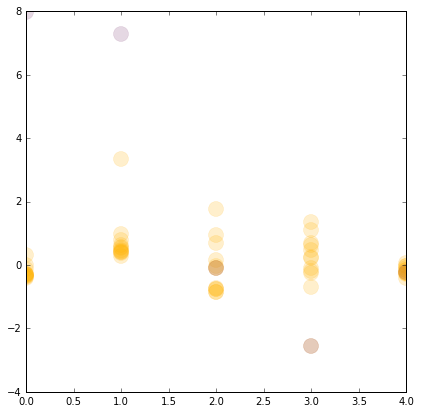

In [218]:
final2_5ck = scipy.cluster.vq.kmeans(w2, 6, iter=1)
kmlabels5_2, kmdistances5_2 = vq(w2, final2_5ck[0])
#print ("5 clusters labels")
#print (kmlabels5)
print ("cluster 1: ", cityname[kmlabels5_2 == 0])
print ("cluster 2: ", cityname[kmlabels5_2 == 1])
print ("cluster 3: ", cityname[kmlabels5_2 == 2])
print ("cluster 4: ", cityname[kmlabels5_2 == 3])
print ("cluster 5: ", cityname[kmlabels5_2 == 4])
print ("cluster 6: ", cityname[kmlabels5_2 == 5])

#print ("cluster 6: ", cityname[kmlabels10 == 5])
#print ("cluster 7: ", cityname[kmlabels10 == 6])
#print ("cluster 8: ", cityname[kmlabels10 == 7])
#print ("cluster 9: ", cityname[kmlabels10 == 8])
#print ("cluster 10: ", cityname[kmlabels10 == 9])

fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w2[kmlabels5_2 == l])):
        pl.plot(w[kmlabels5_2 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)


##Clustering on one feature: informal economy

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

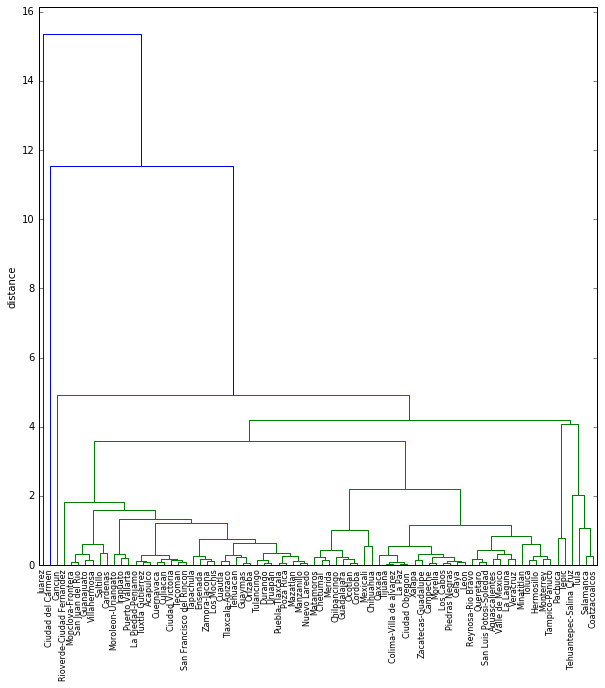

In [204]:
import scipy.cluster as scp
fig = pl.figure(figsize=(10,10))
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(w2, method='ward'),
                               labels = cityname,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
pl.xticks(rotation=90)
pl.grid('off')
#pl.title("tweets dendrogram: \n the cluster hierarchical structure", fontsize=20)
#this is a dendrogram for inspection of the hierarchical structure

##Research Stats quoted in paper

In [194]:
imco['percentemployedformal'].mean()

0.46347959029487185

In [195]:
citygrowth.mean()

0.9652178316153848

In [197]:
imco['population'].mean()

958401.9841589746